In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Unigramas

In [2]:
df = pd.read_csv('../datasets/bullying_twitter_bigrams.csv')

In [3]:
features = df.drop(columns='target').columns
target = 'target'

In [4]:
train, test = train_test_split(df, test_size=len(df)-1500, random_state=123)
train = pd.DataFrame(train).reset_index(drop=True)
test = pd.DataFrame(test).reset_index(drop=True)

In [5]:
accs = []

### Naive Bayes

In [6]:
for i in range(100, 1600, 100):
    t = train.loc[:i]
    
    y_true = test[target]
    y_pred = GaussianNB().fit(t[features], t[target]).predict(test[features])
    
    acc = accuracy_score(y_true, y_pred)
    accs.append(['nb', i, acc])

### SVM Linear

In [7]:
for i in range(100, 1600, 100):
    t = train.loc[:i]
    
    y_true = test[target]
    y_pred = SVC(kernel='linear').fit(t[features], t[target]).predict(test[features])
    
    acc = accuracy_score(y_true, y_pred)
    accs.append(['SVMLinear', i, acc])

### SVM RBF

In [8]:
for i in range(100, 1600, 100):
    t = train.loc[:i]
    
    y_true = test[target]
    y_pred = SVC(gamma='scale').fit(t[features], t[target]).predict(test[features])
    
    acc = accuracy_score(y_true, y_pred)
    accs.append(['SVMRBF', i, acc])

### Logistic Regression

In [9]:
for i in range(100, 1600, 100):
    t = train.loc[:i]
    
    y_true = test[target]
    y_pred = LogisticRegression(solver='lbfgs').fit(t[features], t[target]).predict(test[features])
    
    acc = accuracy_score(y_true, y_pred)
    accs.append(['LogReg', i, acc])

In [10]:
accs = pd.DataFrame(accs, columns=['classifier', 'train_size', 'accuracy'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

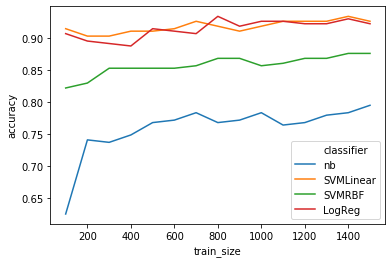

In [12]:
sns.lineplot(x='train_size', y='accuracy', hue='classifier', data=accs)